# Picking the reference scenario // Parallel Axis Plots
-> Parallel Axis Plots for data from 'no policy'-exploration

In [1]:
from dmdu.exploration.ref_scenario_parcoords_utils import *

### 1. Loading the data
For each of the three models, the results are loaded and split into the experiments (DataFrame) and outcomes (dict).

In [2]:
# Loading the data

deffuant_exp, deffuant_out  = get_results('DEFFUANT', scenarios=4, replications=3)
sample_exp, sample_out  = get_results('SAMPLE', scenarios=4, replications=3)
sit_exp, sit_out  = get_results('SIT', scenarios=4, replications=3)


### 2. Transforming from array dicts
The use of the ReplicatorModel has not ScalarOutcomes, but ArrayOutcomes. Because the function for the parallel axis plots of the ema_workbench requires the data input to be DataFrames, the outcomes will be reshaped. Furthermore, to combine the outcomes from all three models in one plot, the outcomes are combined into a single DataFrame.

In [3]:
# Transforming from array dicts (due to ReplicatorModel with ArrayOutcome) to DataFrames
deffuant_out = arraydict_to_df(deffuant_out)
sample_out = arraydict_to_df(sample_out)
sit_out = arraydict_to_df(sit_out)

In [4]:
# Combine outcomes-data from all models (for combined parcoords)
deffuant_out['belief_update_fn'] = 'DEFFUANT'
sample_out['belief_update_fn'] = 'SAMPLE'
sit_out['belief_update_fn'] = 'SIT'
out = pd.concat([deffuant_out, sample_out, sit_out])
out = out.reset_index()  # to not have 'triplicate' indices
out = out.drop(columns=['index'])
out

,n_agents_above_belief_threshold,polarization_variance,engagement,free_speech_constraint,avg_user_effort,belief_update_fn
0,649.0,266.64,265.360,0.027415,36.45,DEFFUANT
1,545.0,321.52,380.924,0.029416,34.83,DEFFUANT
2,672.0,263.39,235.298,0.031018,31.60,DEFFUANT
3,644.0,260.52,246.065,0.063996,32.76,DEFFUANT
4,582.0,279.86,303.067,0.078053,38.83,DEFFUANT
5,445.0,287.46,361.258,0.064083,38.35,DEFFUANT
6,589.0,541.49,153.205,0.165635,22.08,DEFFUANT
7,510.0,562.38,190.874,0.157862,20.99,DEFFUANT
8,575.0,518.19,135.627,0.156735,19.23,DEFFUANT
9,593.0,258.76,240.193,0.072056,28.34,DEFFUANT


### Plotting the Parallel Axis Plot
Below, the resulting parallel axis plot is depicted.

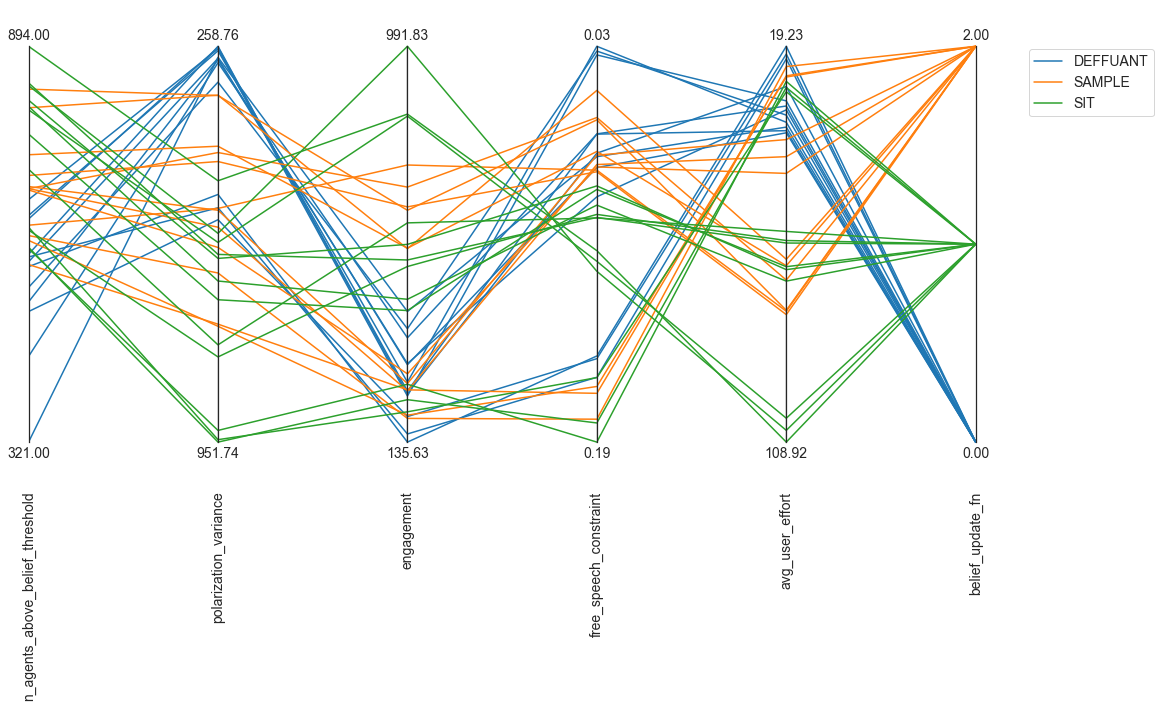

In [5]:
# Parallel Axis Plot
parcoords_color_by(out, 'belief_update_fn')